In [20]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import sys
from os import path

avg_dir='kw_avg_data/'
out_dir='kw_data_files_dis/'

W=40
L=30
Lsc=10
Llead=50
# Lsc_sw=np.array([10])

# parameters
t=1
mu=0.18
lam=0.5
mu_sc= 0.18+t #- 2*lam
Delta=0.03
t_j=1.0
phi=0.0095
gs=0.
gn=0.04

def wf_avg(U0,SC_width):
    Lsc=SC_width
    Nrep=1
    N_avg=0
    plt.figure()
    for i_r in range(Nrep):
        fname= out_dir+ 'twosided_U_%.2f_phi_%.4f_mu_%.2f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ls_%d_Llead_%d_r_%d.npz' % (U0,phi,mu,mu_sc,Delta,t_j,W,L,Lsc,Llead,i_r)
#         fname= out_dir+ 'twosided_U_%.2f_phi_%.4f_mu_%.2f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ls_%d_r_%d.npz' % (U0,phi,mu,mu_sc,Delta,t_j,W,L,Lsc,i_r)       
        if path.exists(fname):
            N_avg += 1
            npzfile = np.load(fname)
            if N_avg==1:
                E_list=npzfile['E_list']
                Pu=npzfile['Pu']
                Pd=npzfile['Pd']
                plt.plot(E_list/Delta,npzfile['Pu'].T)
                plt.plot(E_list/Delta,npzfile['Pd'].T)
            else:
                plt.plot(E_list/Delta,npzfile['Pu'].T)
                plt.plot(E_list/Delta,npzfile['Pd'].T)
                Pu += npzfile['Pu']
                Pd += npzfile['Pd']
    plt.show()
    if N_avg>0:
        Pu= Pu/N_avg
        Pd= Pd/N_avg
        fname=avg_dir+ 'avg_U_%.2f_phi_%.4f_mu_%.2f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ls_%d.npz' % (U0,phi,mu,mu_sc,Delta,t_j,W,L,Lsc)
        np.savez(fname, E_list=E_list, Pu=Pu, Pd=Pd)
        
    return N_avg

# for i_L in range(len(Lsc_sw)):
for U0 in [0]:
    N_avg= wf_avg(U0,Lsc)
    print("Average is computed over %d reps." % (N_avg) )

<Figure size 432x288 with 0 Axes>

Average is computed over 0 reps.


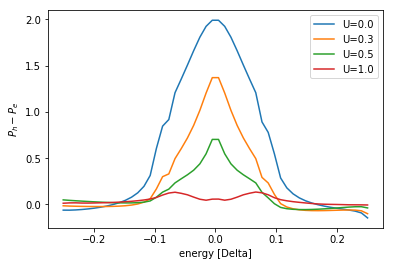

In [28]:
# U0=0.3

# def wf_plot(Energy_index,SC_width):
def wf_plot(U,SC_width):
    Lsc=SC_width
    plt.figure()
    for U0 in U:
        fname=avg_dir+ 'avg_U_%.2f_phi_%.4f_mu_%.2f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ls_%d.npz' % (U0,phi,mu,mu_sc,Delta,t_j,W,L,Lsc)
        npzfile = np.load(fname)
        E_list=npzfile['E_list']
        Pu=npzfile['Pu']
        Pd=npzfile['Pd']

#     i_e=Energy_index
#     if not sys.warnoptions:
#         import warnings
#         warnings.simplefilter("ignore")
#     ind=0
#     fig, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(12, 3))
#     pyplot.subplot(1,2,1)
# #     pyplot.figure()
#     Zmat=abs(wf_arr[ind,::2,i_e])**2-abs(wf_arr[ind,1::2,i_e])**2
#     Zmat_plot=np.fliplr(np.reshape(Zmat,[L,W])).T
#     pos=pyplot.imshow(Zmat_plot, cmap='RdBu_r')#, aspect="auto",
# #                                 interpolation='none')
#     pyplot.clim(-0.3,0.3)
#     pyplot.xlabel("x")
#     pyplot.ylabel("y")
#     pyplot.title(r"$E/\Delta=%.2f$" % (E_list[i_e]/Delta))
#     fig.colorbar(pos)
#     pyplot.subplot(1,2,2)
#         plt.plot(E_list/Delta, Pu.T)
#         plt.plot(E_list/Delta, Pd.T)
#         plt.legend((r'$e_\uparrow$', r'$e_\downarrow$', r'$h_\uparrow$', r'$h_\downarrow$'))
        plt.xlabel("energy [Delta]")
        plt.ylabel(r"$P_h-P_e$")
        P1=Pu[0,:]+Pu[1,:]-Pu[2,:]-Pu[3,:]
        P2=Pd[0,:]+Pd[1,:]-Pd[2,:]-Pd[3,:]
        plt.plot(E_list/Delta, -(P1+P2).T,label='U=%.1f' % (U0))
#         print(np.max(P1+P2), np.max(E_list/Delta))
    plt.legend()
    plt.savefig('figs/kwant_disorder_nu_2.pdf')
    plt.show()

# NE=100
# interact(wf_plot, Energy_index=(0,NE-1,1), SC_width=np.array([10]));
U=[0, 0.3,0.5,1.0]
wf_plot(U,10)

